In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e10/sample_submission.csv
/kaggle/input/playground-series-s3e10/train.csv
/kaggle/input/playground-series-s3e10/test.csv


In [2]:
import seaborn as sns
import joblib
import optuna

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s3e10/train.csv')
test =pd.read_csv('/kaggle/input/playground-series-s3e10/test.csv')
display(train)
display(train.info())
display(train.describe())
display(train.isnull().any())

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0
...,...,...,...,...,...,...,...,...,...,...
117559,117559,132.843750,56.748838,-0.060070,-0.554084,4.054348,27.844144,6.564423,44.442664,0
117560,117560,112.578125,52.539271,0.179580,-0.306961,1.637960,15.331913,11.384718,142.535470,0
117561,117561,119.757812,49.980013,0.064402,-0.270822,3.877926,19.788559,6.959740,56.367789,0
117562,117562,105.789062,46.986595,0.441426,0.372466,2.097826,17.170612,9.442445,99.074539,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    117564 non-null  int64  
 1   Mean_Integrated       117564 non-null  float64
 2   SD                    117564 non-null  float64
 3   EK                    117564 non-null  float64
 4   Skewness              117564 non-null  float64
 5   Mean_DMSNR_Curve      117564 non-null  float64
 6   SD_DMSNR_Curve        117564 non-null  float64
 7   EK_DMSNR_Curve        117564 non-null  float64
 8   Skewness_DMSNR_Curve  117564 non-null  float64
 9   Class                 117564 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 9.0 MB


None

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000
mean,58781.500000,111.248300,46.713535,0.503498,1.886385,11.962921,26.190678,8.037488,93.881076,0.093285
std,33937.947861,24.906474,6.102941,1.127093,6.515466,26.719946,20.041937,3.840980,79.962110,0.290833
min,0.000000,6.054688,24.783273,-1.730782,-1.791886,0.213211,7.370432,-2.597872,-1.976976,0.000000
25%,29390.750000,104.546875,43.443390,0.049761,-0.188956,2.090301,14.955405,6.742911,49.409136,0.000000
50%,58781.500000,116.664062,47.478932,0.186498,0.091720,2.808528,18.164924,8.442883,83.421375,0.000000
75%,88172.250000,126.296875,50.862718,0.395620,0.691613,4.122910,24.732218,10.003237,122.093290,0.000000
max,117563.000000,189.367188,93.602933,7.879628,65.385974,217.371238,109.890785,34.539844,1191.000837,1.000000


id                      False
Mean_Integrated         False
SD                      False
EK                      False
Skewness                False
Mean_DMSNR_Curve        False
SD_DMSNR_Curve          False
EK_DMSNR_Curve          False
Skewness_DMSNR_Curve    False
Class                   False
dtype: bool

0    106597
1     10967
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='Count'>

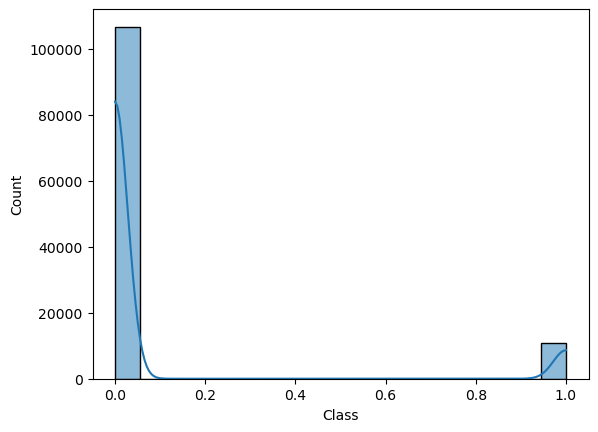

In [4]:
print(train.Class.value_counts())
sns.histplot(data=train[['Class']], x='Class', kde=True)

<AxesSubplot:>

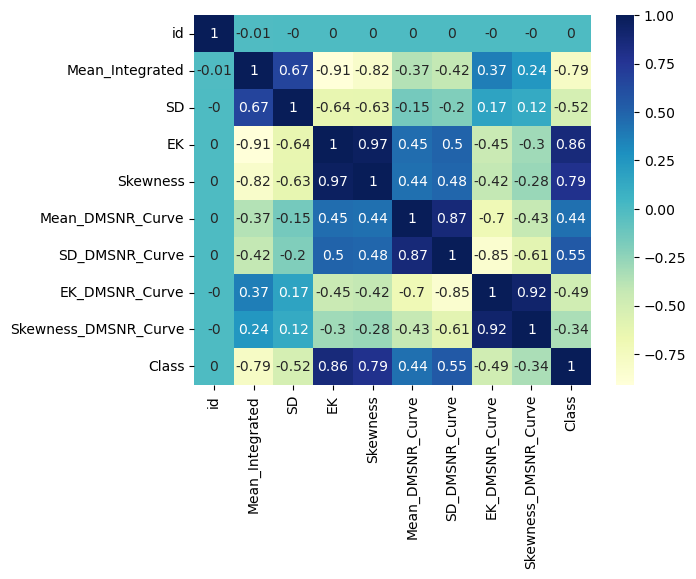

In [5]:
sns.heatmap(data=train.corr().round(2),cmap="YlGnBu",annot=True)

In [6]:
def clean(data):
    data=data.drop(['id'],axis=1)
    return data

train_pre=clean(train)
test_pre=clean(test)

In [7]:
from sklearn.model_selection import train_test_split

y=train_pre['Class']
X=train_pre.drop('Class',axis=1)

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
100151,117.289062,46.829120,0.152475,0.106734,2.496656,16.515567,8.778636,97.569187
45660,106.976562,48.029653,0.565406,0.263587,111.006689,82.489980,-0.540919,-1.688908
198,132.742188,57.882668,-0.221301,-0.742605,3.211538,22.451232,8.189991,71.616974
91924,106.593750,44.774773,0.482009,0.452013,2.770903,16.836345,8.322915,85.172403
87875,126.085938,60.248734,0.058579,-0.710809,2.398829,15.353178,9.424440,111.474453
...,...,...,...,...,...,...,...,...
76820,111.679688,47.929430,0.516412,0.581796,2.973244,18.958161,8.042284,73.163688
110268,97.718750,49.695626,0.493286,0.174874,0.990803,10.469512,15.938185,308.955388
103694,121.929688,50.890363,0.282531,-0.209978,3.681438,25.070439,7.236288,54.079476
860,101.242188,50.496838,0.464908,0.134085,4.157191,26.057511,6.585016,43.935780


# 使用SMOTE

In [8]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE(random_state=42).fit_resample(X_train,y_train)

<AxesSubplot:xlabel='Class', ylabel='Count'>

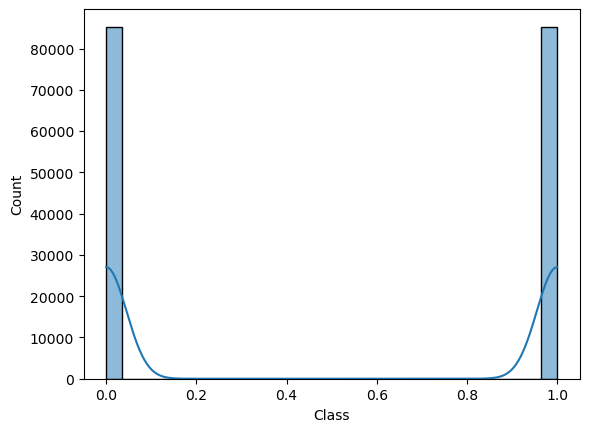

In [9]:
sns.histplot(data=y_res, kde=True)

In [10]:
from sklearn.preprocessing import StandardScaler

num_features=[x for x in train_pre.columns.to_list() if x != 'Class']
scaler = StandardScaler()

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_val[num_features] = scaler.transform(X_val[num_features])
X_train

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
100151,0.242438,0.017932,-0.311458,-0.273273,-0.354064,-0.482325,0.191529,0.044029
45660,-0.171851,0.214379,0.055456,-0.249126,3.695152,2.804793,-2.230998,-1.194299
198,0.863245,1.826664,-0.643581,-0.404025,-0.327387,-0.186586,0.038516,-0.279746
91924,-0.187230,-0.318229,-0.018647,-0.220119,-0.343830,-0.466343,0.073068,-0.110631
87875,0.595840,2.213833,-0.394890,-0.399130,-0.357714,-0.540240,0.359399,0.217509
...,...,...,...,...,...,...,...,...
76820,0.017090,0.197979,0.011922,-0.200139,-0.336279,-0.360625,0.000121,-0.260450
110268,-0.543771,0.486989,-0.008627,-0.262783,-0.410257,-0.783565,2.052583,2.681249
103694,0.428869,0.682488,-0.195895,-0.322029,-0.309852,-0.056086,-0.209390,-0.498541
860,-0.402222,0.618094,-0.033842,-0.269062,-0.292098,-0.006906,-0.378681,-0.625093


In [11]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from  lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

'solver' : trial.suggest_categorical("solver", ("lbfgs", "saga",'sag','liblinear'))
'penalty':trial.suggest_categorical("penalty",('l2','l1','elasticnet'))

經過測試後solver用default的lbfgs，那penalty就選l2


In [12]:
%%time
import optuna
from sklearn.linear_model import LogisticRegression

def objective_lr(trial):
    params = {
        'C' : trial.suggest_float("C", 200, 10000, log=True),
        'max_iter':trial.suggest_int('max_iter',150,1000)
    
    }
    # 建立 LogisticRegressor 模型
    lr=LogisticRegression(**params)
    # 使用訓練資料訓練模型
    lr.fit(X_train,y_train)
    loss=log_loss(y_val, lr.predict_proba(X_val))

    return loss

study_lr = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lr.optimize(objective_lr, n_trials=100)

[I 2023-03-22 07:33:21,571] A new study created in memory with name: no-name-016bb930-12e9-4f2a-854f-0073e8a344e8


CPU times: user 1min 3s, sys: 23 s, total: 1min 26s
Wall time: 45.7 s


In [13]:
display(optuna.visualization.plot_param_importances(study_lr))
display(optuna.visualization.plot_parallel_coordinate(study_lr))
display(optuna.visualization.plot_optimization_history(study_lr))

In [14]:
lr=LogisticRegression(**study_lr.best_params)
lr.fit(X_train,y_train)

score = cross_val_score(lr, X_train, y_train, scoring="neg_log_loss")

print(f'RMSE score train : {np.mean(score)}')
print(f'RMSE score test : {log_loss(y_val, lr.predict_proba(X_val))}')

RMSE score train : -0.039883064163886636
RMSE score test : 0.03937510487499325


In [15]:
%%time
import optuna
from sklearn.ensemble import RandomForestClassifier

def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators',50,100),
        'max_depth': trial.suggest_int('max_depth',1,20),
        'min_samples_split' : trial.suggest_int('min_samples_split', 10, 30)

    }
    # 建立 LogisticRegressor 模型
    rf=RandomForestClassifier(**params)
    # 使用訓練資料訓練模型
    rf.fit(X_train,y_train)
    loss=log_loss(y_val, rf.predict_proba(X_val))

    return loss

study_rf = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_rf.optimize(objective_rf, n_trials=50)

CPU times: user 8min 44s, sys: 387 ms, total: 8min 44s
Wall time: 8min 46s


In [16]:
display(optuna.visualization.plot_param_importances(study_rf))
display(optuna.visualization.plot_parallel_coordinate(study_rf))
display(optuna.visualization.plot_optimization_history(study_rf))

In [17]:
rf=RandomForestClassifier(**study_rf.best_params)
rf.fit(X_train,y_train)

score = cross_val_score(rf, X_train, y_train, scoring="neg_log_loss")

print(f' score train : {np.mean(score)}')
print(f' score test : {log_loss(y_val, rf.predict_proba(X_val))}')

 score train : -0.03246953689845169
 score test : 0.03340645802649796


In [18]:
#study_cat = joblib.load('/kaggle/input/models/study_cat.pkl')
#study_xgb = joblib.load("/kaggle/input/models/study_xgb.pkl")
#study_lgbm = joblib.load("/kaggle/input/models/study_lgbm.pkl")
#study_en = joblib.load("/kaggle/input/models/study_en.pkl")

In [19]:
%%time
import optuna
from catboost import CatBoostClassifier

def objective_cat(trial):
    params = {
        'iterations':trial.suggest_int("iterations", 100, 1000),
        'learning_rate':trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "depth":trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg":trial.suggest_float("l2_leaf_reg", 1e-3, 100.0, log=True),
        "verbose":False,
        'task_type': 'GPU'

    }
    # 建立 LogisticRegressor 模型
    cat=CatBoostClassifier(**params)
    # 使用訓練資料訓練模型
    cat.fit(X_train,y_train)
    loss=log_loss(y_val, cat.predict_proba(X_val))

    return loss

study_cat = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_cat.optimize(objective_cat, n_trials=50)

joblib.dump(study_cat, "study_cat.pkl")

CPU times: user 6min 27s, sys: 2min 21s, total: 8min 49s
Wall time: 6min 12s


['study_cat.pkl']

In [20]:
# %%time
# import optuna
# from catboost import CatBoostClassifier

# def objective_cat_res(trial):
#     params = {
#         'iterations':trial.suggest_int("iterations", 100, 1000),
#         'learning_rate':trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
#         "depth":trial.suggest_int("depth", 4, 10),
#         "l2_leaf_reg":trial.suggest_float("l2_leaf_reg", 1e-3, 100.0, log=True),
#         "verbose":False,
#         'task_type': 'GPU'

#     }
#     # 建立 LogisticRegressor 模型
#     cat=CatBoostClassifier(**params)
#     # 使用訓練資料訓練模型
#     cat.fit(X_res,y_res)
#     loss=log_loss(y_val, cat.predict_proba(X_val))

#     return loss

# study_cat_res = optuna.create_study(direction='minimize')
# optuna.logging.set_verbosity(optuna.logging.WARNING)
# study_cat_res.optimize(objective_cat_res, n_trials=50)

# joblib.dump(study_cat_res, "study_cat_res.pkl")

In [21]:
display(optuna.visualization.plot_param_importances(study_cat))
display(optuna.visualization.plot_parallel_coordinate(study_cat))
display(optuna.visualization.plot_optimization_history(study_cat))

In [22]:
cat=CatBoostClassifier(**study_cat.best_params,verbose=False,task_type= 'GPU')
cat.fit(X_train,y_train)

score = cross_val_score(cat, X_train, y_train, scoring="neg_log_loss")

print(f' score train : {np.mean(score)}')
print(f' score test : {log_loss(y_val, cat.predict_proba(X_val))}')

 score train : -0.031280806956703835
 score test : 0.0323206063601593


In [23]:
# cat_res=CatBoostClassifier(**study_cat_res.best_params,verbose=False,task_type= 'GPU')
# cat_res.fit(X_train,y_train)

# score = cross_val_score(cat_res, X_res, y_res, scoring="neg_log_loss")

# print(f' score train : {np.mean(score)}')
# print(f' score test : {log_loss(y_val, cat_res.predict_proba(X_val))}')

In [24]:
study_cat.best_params

{'iterations': 760,
 'learning_rate': 0.09979099690822847,
 'depth': 4,
 'l2_leaf_reg': 9.614042007821833}

In [25]:
%%time
import optuna
from xgboost import XGBClassifier

def objective_xgb(trial):
    params = {
        'n_estimators':trial.suggest_int("n_estimators", 100, 1000),
        'learning_rate':trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "max_depth":trial.suggest_int("max_depth", 4, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'gamma': trial.suggest_float('gamma', 0.0001, 1.0, log = True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.8),
        "tree_method":'gpu_hist'
    }

    xgb=XGBClassifier(**params)
    # 使用訓練資料訓練模型
    xgb.fit(X_train,y_train)
    loss=log_loss(y_val, xgb.predict_proba(X_val))

    return loss

study_xgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xgb, n_trials=50)

joblib.dump(study_xgb, "study_xgb.pkl")


CPU times: user 43.6 s, sys: 564 ms, total: 44.2 s
Wall time: 38.3 s


['study_xgb.pkl']

In [26]:
display(optuna.visualization.plot_param_importances(study_xgb))
display(optuna.visualization.plot_parallel_coordinate(study_xgb))
display(optuna.visualization.plot_optimization_history(study_xgb))

In [27]:
xgb=XGBClassifier(**study_xgb.best_params,tree_method='gpu_hist')
xgb.fit(X_train,y_train,verbose = False)

score = cross_val_score(xgb, X_train, y_train, scoring="neg_log_loss")

print(f' score train : {np.mean(score)}')
print(f' score test : {log_loss(y_val, xgb.predict_proba(X_val))}')

 score train : -0.03162985529846313
 score test : 0.03232559406133048


In [28]:
%%time
import optuna
from  lightgbm import LGBMClassifier

def objective_lgbm(trial):
    params = {
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 10.0),
        'max_depth': trial.suggest_int('max_depth', 5, 64),
        'learning_rate':trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 2000, 8000),
        'cat_smooth' : trial.suggest_int('cat_smooth', 10, 100),
        'cat_l2': trial.suggest_int('cat_l2', 1, 20),
        'min_data_per_group': trial.suggest_int('min_data_per_group', 50, 200),
        'cat_feature' : [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 
                         32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 
                         53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67],
        'n_jobs' : -1, 
        'random_state': 42,
        'boosting_type': 'gbdt',
        'metric': 'binary_logloss',
        'device': 'gpu'
    }

    lgbm=LGBMClassifier(**params)
    # 使用訓練資料訓練模型
    lgbm.fit(X_train,y_train)
    loss=log_loss(y_val, lgbm.predict_proba(X_val))

    return loss

study_lgbm = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgbm.optimize(objective_lgbm, n_trials=50)

joblib.dump(study_lgbm, "study_lgbm.pkl")

[LightGBM] [Fatal] Check failed: (best_split_info.left_count) > (0) at /usr/local/src/LightGBM/src/treelearner/serial_tree_learner.cpp, line 653 .

[W 2023-03-22 07:55:03,794] Trial 7 failed with parameters: {'reg_alpha': 8.155774443855341, 'reg_lambda': 7.611816311927169, 'max_depth': 14, 'learning_rate': 0.03596518100133199, 'colsample_bytree': 0.487344784347854, 'n_estimators': 5994, 'cat_smooth': 75, 'cat_l2': 18, 'min_data_per_group': 95} because of the following error: LightGBMError('Check failed: (best_split_info.left_count) > (0) at /usr/local/src/LightGBM/src/treelearner/serial_tree_learner.cpp, line 653 .\n').
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<timed exec>", line 27, in objective_lgbm
  File "/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py", line 972, in fit
    callbacks=callbacks, init_model=init_model)
  File "/opt/conda/l

LightGBMError: Check failed: (best_split_info.left_count) > (0) at /usr/local/src/LightGBM/src/treelearner/serial_tree_learner.cpp, line 653 .


In [29]:
display(optuna.visualization.plot_param_importances(study_lgbm))
display(optuna.visualization.plot_parallel_coordinate(study_lgbm))
display(optuna.visualization.plot_optimization_history(study_lgbm))

In [30]:
lgbm= LGBMClassifier(**study_lgbm.best_params)
lgbm.fit(X_train,y_train)

score = cross_val_score(lgbm, X_train, y_train, scoring="neg_log_loss")

print(f' score train : {np.mean(score)}')
print(f' score test : {log_loss(y_val, lgbm.predict_proba(X_val))}')

 score train : -0.03145479206662764
 score test : 0.032074318034441385


In [31]:
%%time
def objective_en(trial):
    a=trial.suggest_float('a',0, 10)
    b=trial.suggest_float('b',0, 10)
    c=trial.suggest_float('c',0, 10)

    predict_sum=(a*lgbm.predict_proba(X_val)+b*xgb.predict_proba(X_val)+c*cat.predict_proba(X_val))/(a+b+c)
    
    loss=log_loss(y_val,predict_sum)

    return loss

study_en = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_en.optimize(objective_en, n_trials=100)

joblib.dump(study_en, "study_en.pkl")

CPU times: user 4min 14s, sys: 1.29 s, total: 4min 15s
Wall time: 2min 15s


['study_en.pkl']

In [32]:
display(optuna.visualization.plot_param_importances(study_en))
display(optuna.visualization.plot_parallel_coordinate(study_en))
display(optuna.visualization.plot_optimization_history(study_en))

In [33]:
study_en.best_value

0.03167015484705039

In [34]:
a=study_en.best_params['a']
b=study_en.best_params['b']
c=study_en.best_params['c']

In [35]:
test_pre[num_features] = scaler.transform(test_pre[num_features]) 

In [36]:
submission_preds=(a*lgbm.predict_proba(test_pre)[:, 1]+b*xgb.predict_proba(test_pre)[:, 1]+c*cat.predict_proba(test_pre)[:, 1])/(a+b+c)

submission_preds

array([1.00766765e-04, 5.56627919e-04, 2.75364578e-04, ...,
       1.64509825e-04, 5.17894966e-02, 9.81117517e-01])

In [37]:
#submission_preds=cat.predict_proba(test_pre)[:, 1]

In [38]:
df=pd.DataFrame({"id":test['id'].values,"Class":submission_preds})
df.to_csv("submission_S3E10.csv",index=False)